In [27]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def imprimir(_M,jogada) :
    [m,n] = _M.shape
    #C = colormap([1 1 1; 0 0 0; 0 1 0]
    fig, ax = plt.subplots()
    i = ax.imshow(_M, interpolation='nearest', cmap=cm.BuPu, vmin=0, vmax=2)
    #fig.colorbar(i)
    print("Jogada ",str(jogada)) 
    plt.show()

def inverter(val) :
    if val == 0 :
        return 1
    if val == 1 :
        return  0

def tabuleiro(_X,_M) :
    [m,n] = _M.shape
    iv = np.arange(0,m)
    random.shuffle(iv)
    jv = np.arange(0,n)
    random.shuffle(jv) 
    jogada=0
    for i in iv  :
        for j in jv :
            if _X[i,j] == 1 :      
                jogada = jogada + 1                    
                _M[i,j] = _M[i,j] + 2
                imprimir(_M,jogada) 
                if i > 0 :
                    _M[i-1,j] = inverter(_M[i-1,j])
                if i < m-1 :
                    _M[i+1,j] = inverter(_M[i+1,j])
                if j > 0 :
                    _M[i,j-1] = inverter(_M[i,j-1])
                if j < n-1 :                
                    _M[i,j+1] = inverter(_M[i,j+1])
                _M[i,j] = _M[i,j] - 2
                _M[i,j] = inverter(_M[i,j])          
                imprimir(_M,jogada)   
 
    return _M   

Puzzle original:
[[0 0 1 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
optimal
Solução de cliques:
[[1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [1. 1. 0. 1. 1.]
 [0. 1. 0. 1. 0.]]
Jogada  1


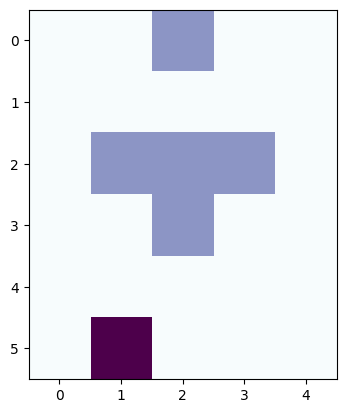

Jogada  1


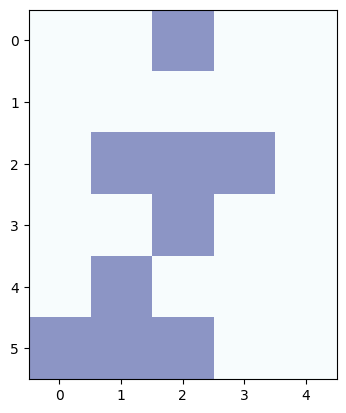

Jogada  2


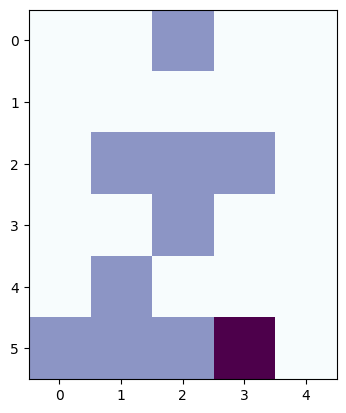

Jogada  2


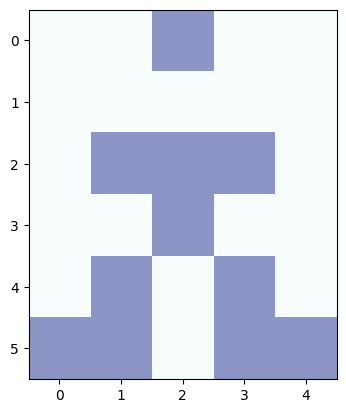

Jogada  3


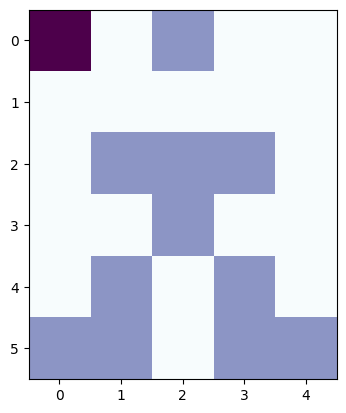

Jogada  3


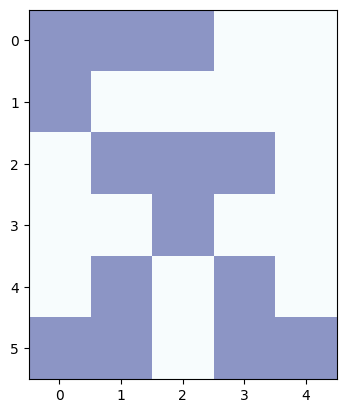

Jogada  4


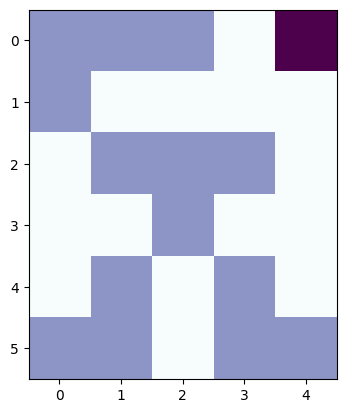

Jogada  4


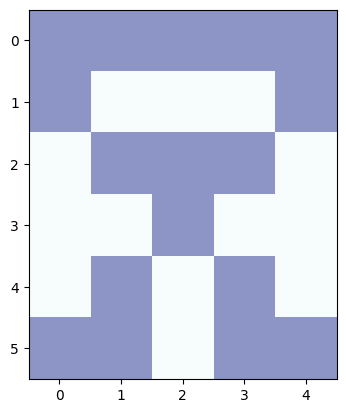

Jogada  5


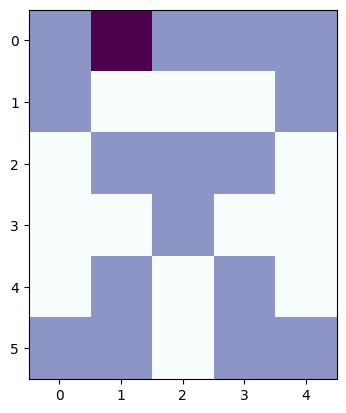

Jogada  5


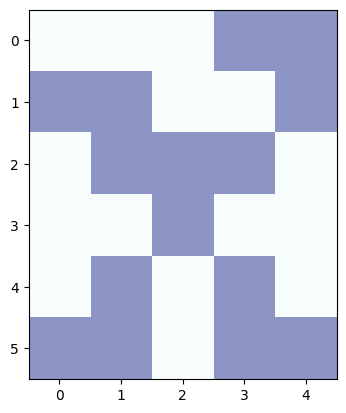

Jogada  6


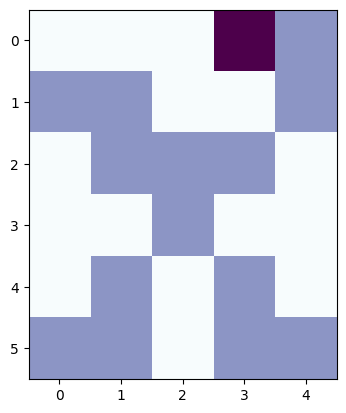

Jogada  6


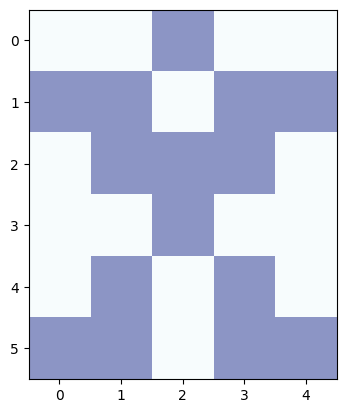

Jogada  7


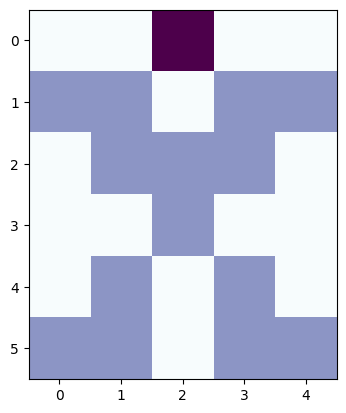

Jogada  7


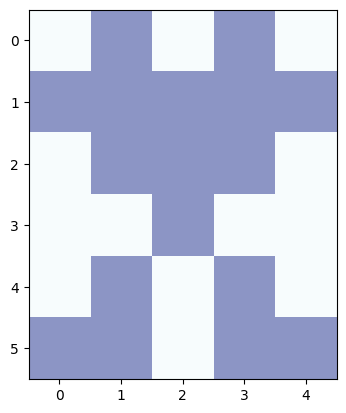

Jogada  8


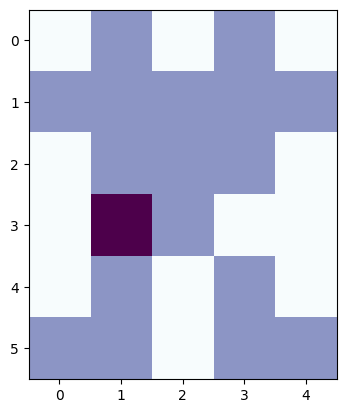

Jogada  8


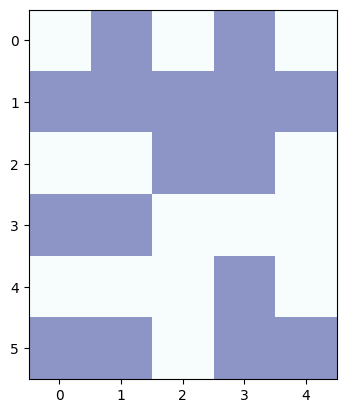

Jogada  9


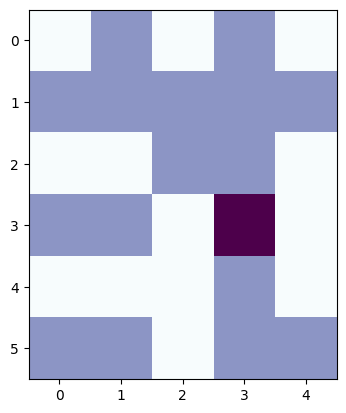

Jogada  9


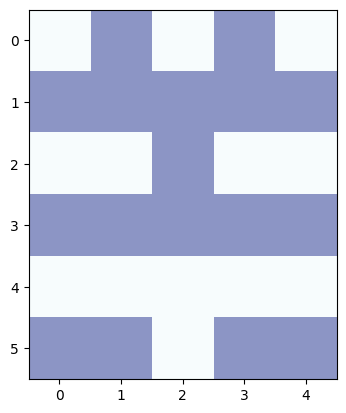

Jogada  10


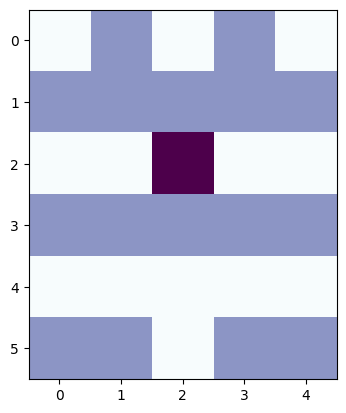

Jogada  10


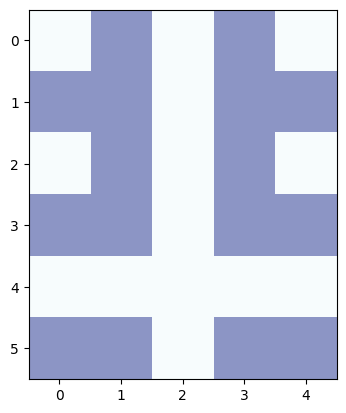

Jogada  11


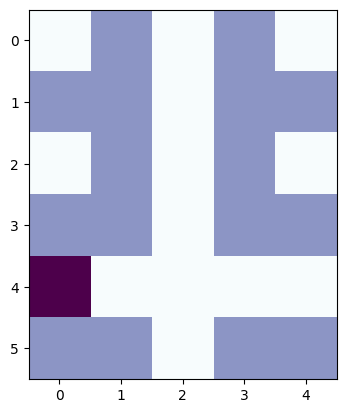

Jogada  11


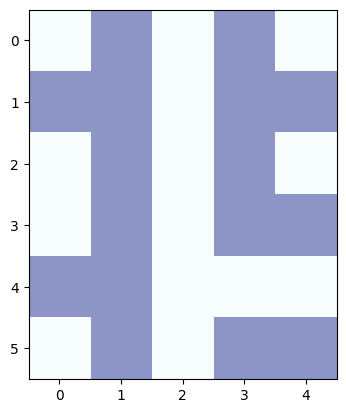

Jogada  12


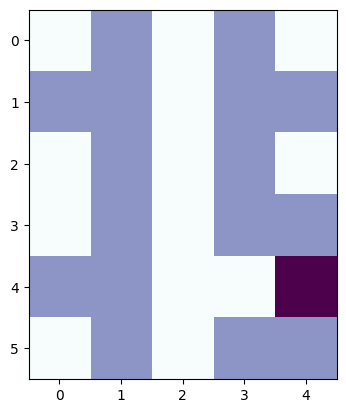

Jogada  12


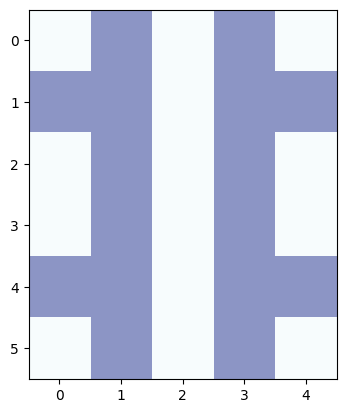

Jogada  13


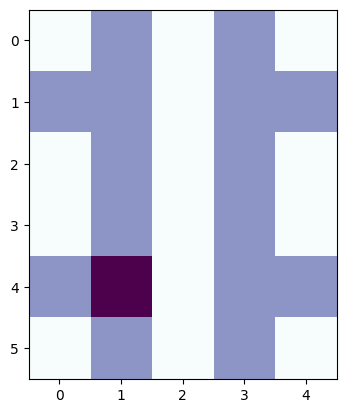

Jogada  13


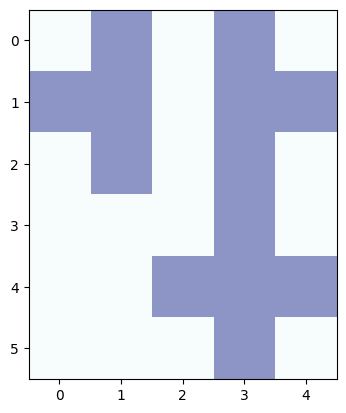

Jogada  14


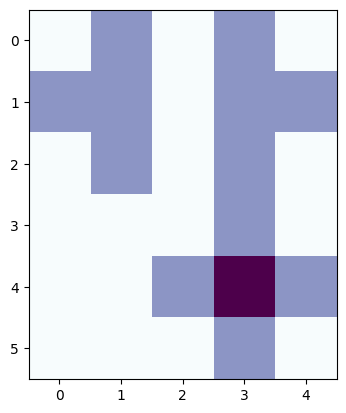

Jogada  14


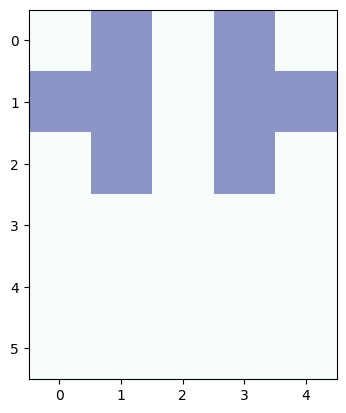

Jogada  15


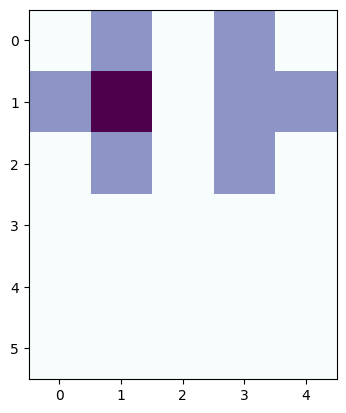

Jogada  15


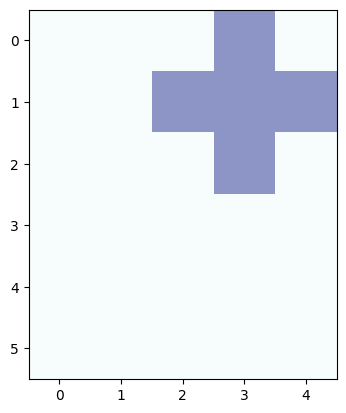

Jogada  16


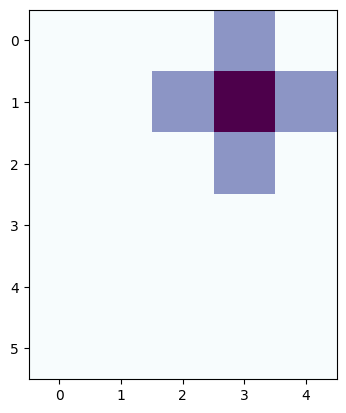

Jogada  16


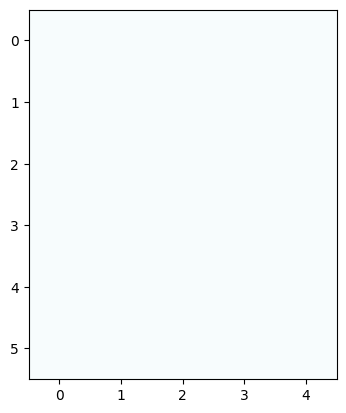

In [39]:
import numpy as np 
import cvxpy as cp 

def solve_game(initial_state):
    x = cp.Variable(initial_state.shape, boolean=True, name='x')
    cummulative = cp.Variable(initial_state.shape, integer=True, name='c')
    k = cp.Variable(initial_state.shape, integer=True, name='k')
    constraints = []
    rows = initial_state.shape[0]
    columns = initial_state.shape[1]

    for i in range(rows):
        for j in range(columns):
            # Safely access neighbors (treat out-of-bounds as 0)
            top = x[i-1,j] if i-1 >= 0 else 0
            bottom = x[i+1,j] if i+1 < rows else 0
            left = x[i][j-1] if j-1 >= 0 else 0
            right = x[i][j+1] if j+1 < columns else 0

            constraints.append(cummulative[i,j] == x[i,j] + initial_state[i,j] \
                               + top + bottom \
                               + left + right)
            
            constraints.append(cummulative[i,j] - 2*k[i,j] == 0)

    objective = cp.Minimize(cp.sum(x))
    # Resolve o problema
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCIP) 

    print(problem.status)
    print("Solução de cliques:")
    print(x.value)

    return x.value

if __name__ == '__main__':
    
    #puzzle = np.array([
    #    [1,0,1,1,1],
    #    [1,0,1,0,1],
    #    [0,0,1,0,0],
    #    [1,0,0,1,1],
    #    [0,1,0,1,0],
    #    [1,1,0,1,0]
    #])

    puzzle = np.array([
        [0,0,1,0,0],
        [0,0,0,0,0],
        [0,1,1,1,0],
        [0,0,1,0,0],
        [0,0,0,0,0],
        [0,0,0,0,0]
    ])
    
    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_game(puzzle)

    tabuleiro(solution, puzzle)

In [3]:
import numpy as np
import cvxpy as cp

def solve_sudoku(puzzle):
    # Cria as variáveis de decisão (9x9x9 binary cube)
    x = cp.Variable((9, 9, 9), boolean=True)
    
    # Define as restrições
    constraints = []
    
    # Restrição 1: Cada célula contém exatamente um número
    for i in range(9):
        for j in range(9):
            constraints.append(cp.sum(x[i, j, :]) == 1)
    
    # Restrição 2: Cada número aparece exatamente uma vez em cada linha
    for k in range(9):
        for i in range(9):
            constraints.append(cp.sum(x[i, :, k]) == 1)
    
    # Restrição 3: Cada número aparece exatamente uma vez em cada coluna
    for k in range(9):
        for j in range(9):
            constraints.append(cp.sum(x[:, j, k]) == 1)
    
    # Restrição 4: Cada número aparece exatamente uma vez em cada bloco 3x3
    for k in range(9):
        for block_row in range(3):
            for block_col in range(3):
                constraints.append(
                    cp.sum(x[block_row*3:(block_row+1)*3, 
                            block_col*3:(block_col+1)*3, k]) == 1
                )
    
    # Restrição 5: Fixar os valores conhecidos do puzzle
    for i in range(9):
        for j in range(9):
            if puzzle[i, j] != 0:
                k = puzzle[i, j] - 1  # Convertendo para índice 0-based
                constraints.append(x[i, j, k] == 1)
    
    # O problema de Sudoku é de satisfação (sem função objetivo)
    objective = cp.Minimize(0)
    
    # Resolve o problema
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCIP) 
    
    if problem.status == cp.OPTIMAL:
        # Converte a solução para uma matriz 9x9
        solution = np.zeros((9, 9), dtype=int)
        for i in range(9):
            for j in range(9):
                for k in range(9):
                    if np.isclose(x[i, j, k].value, 1.0):
                        solution[i, j] = k + 1  # Convertendo para 1-based
        return solution
    else:
        return None

# Exemplo de uso
if __name__ == "__main__":
    # Exemplo de puzzle Sudoku (0 representa células vazias)
    puzzle = np.array([
        [9, 0, 2, 4, 1, 5, 0, 0, 0],
        [0, 0, 5, 0, 6, 0, 0, 0, 0],
        [3, 7, 0, 0, 0, 0, 0, 6, 1],
        [2, 1, 0, 3, 9, 6, 0, 0, 5],
        [4, 0, 6, 0, 0, 0, 0, 0, 2],
        [0, 0, 3, 0, 8, 0, 1, 9, 0],
        [6, 4, 9, 0, 3, 1, 0, 5, 7],
        [5, 0, 0, 6, 0, 0, 0, 0, 4],
        [8, 0, 7, 5, 0, 9, 0, 0, 0]
    ])
    
    print("Puzzle original:")
    print(puzzle)
    
    solution = solve_sudoku(puzzle)
    
    if solution is not None:
        print("\nSolução encontrada:")
        print(solution)
    else:
        print("\nNão foi encontrada solução para o puzzle.")

Puzzle original:
[[9 0 2 4 1 5 0 0 0]
 [0 0 5 0 6 0 0 0 0]
 [3 7 0 0 0 0 0 6 1]
 [2 1 0 3 9 6 0 0 5]
 [4 0 6 0 0 0 0 0 2]
 [0 0 3 0 8 0 1 9 0]
 [6 4 9 0 3 1 0 5 7]
 [5 0 0 6 0 0 0 0 4]
 [8 0 7 5 0 9 0 0 0]]

Solução encontrada:
[[9 6 2 4 1 5 3 7 8]
 [1 8 5 7 6 3 4 2 9]
 [3 7 4 9 2 8 5 6 1]
 [2 1 8 3 9 6 7 4 5]
 [4 9 6 1 5 7 8 3 2]
 [7 5 3 2 8 4 1 9 6]
 [6 4 9 8 3 1 2 5 7]
 [5 3 1 6 7 2 9 8 4]
 [8 2 7 5 4 9 6 1 3]]


In [54]:
import cvxpy as cp
import numpy as np

# Definindo o problema do cadeado
digitos = 10  # dígitos de 0 a 9
senha = [3, 5, 7]  # senha verdadeira (exemplo)

# Dicas fornecidas (cada dica é uma tentativa com [A,B,C] e resposta (corretos, posição correta))
dicas = [
    ([7, 9, 3], (1, 1)),  
    ([7, 2, 5], (1, 0)),  
    ([3, 1, 7], (2, 0)),  
    ([8, 4, 9], (0, 0)),   
    ([8, 9, 1], (1, 0))   
]

# Variáveis de decisão
X = cp.Variable((3, digitos), boolean=True, name='x')  # X[i,j] = 1 se dígito j está na posição i

# Restrições
constraints = []

# Cada posição tem exatamente um dígito
for i in range(3):
    constraints.append(cp.sum(X[i,:]) == 1)

# Restrições das dicas
for tentativa, (corretos, pos_corretas) in dicas:
    # Dígitos corretos (em qualquer posição)
    corretos_any_pos = cp.sum([cp.sum(X[:,tentativa[i]]) for i in range(3)])
    constraints.append(corretos_any_pos == corretos)
    
    # Dígitos na posição correta
    corretos_pos = cp.sum([X[i,tentativa[i]] for i in range(3)])
    constraints.append(corretos_pos == pos_corretas)

# Função objetivo (não há objetivo real, queremos apenas satisfazer as restrições)
objective = cp.Minimize(0)
print([str(c) for c in constraints])
# Resolver o problema
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.SCIP)

print(problem.status)

# Mostrar a solução
if problem.status == 'optimal':
    solucao = [int(np.argmax(X[i].value)) for i in range(3)]
    print("Senha encontrada:", solucao)
else:
    print("Não foi possível encontrar uma senha que satisfaça todas as dicas.")

['Sum(x[0, 0:10], None, False) == 1.0', 'Sum(x[1, 0:10], None, False) == 1.0', 'Sum(x[2, 0:10], None, False) == 1.0', 'Sum(x[0:3, 7], None, False) + Sum(x[0:3, 9], None, False) + Sum(x[0:3, 3], None, False) == 1.0', 'x[0, 7] + x[1, 9] + x[2, 3] == 1.0', 'Sum(x[0:3, 7], None, False) + Sum(x[0:3, 2], None, False) + Sum(x[0:3, 5], None, False) == 1.0', 'x[0, 7] + x[1, 2] + x[2, 5] == 0.0', 'Sum(x[0:3, 3], None, False) + Sum(x[0:3, 1], None, False) + Sum(x[0:3, 7], None, False) == 2.0', 'x[0, 3] + x[1, 1] + x[2, 7] == 0.0', 'Sum(x[0:3, 8], None, False) + Sum(x[0:3, 4], None, False) + Sum(x[0:3, 9], None, False) == 0.0', 'x[0, 8] + x[1, 4] + x[2, 9] == 0.0', 'Sum(x[0:3, 8], None, False) + Sum(x[0:3, 9], None, False) + Sum(x[0:3, 1], None, False) == 1.0', 'x[0, 8] + x[1, 9] + x[2, 1] == 0.0']
optimal
Senha encontrada: [1, 5, 3]


In [6]:
import cvxpy as cp
import numpy as np

def solve_queens_puzzle(predefined_board):
    # Variável de decisão: matriz 8x8 binária (rainhas adicionais)
    queens = cp.Variable((8, 8), boolean=True)
    
    # Restrições
    constraints = []
    
    # 1. Respeitar as rainhas pré-definidas
    for i in range(8):
        for j in range(8):
            if predefined_board[i, j] == 1:
                constraints.append(queens[i, j] == 1)
            else:
                constraints.append(queens[i, j] <= 1)  # Pode ser 0 ou 1
    
    # 2. Exatamente 8 rainhas no total
    constraints.append(cp.sum(queens) == 8)
    
    # 3. No máximo uma rainha por linha
    for i in range(8):
        constraints.append(cp.sum(queens[i, :]) <= 1)
    
    # 4. No máximo uma rainha por coluna
    for j in range(8):
        constraints.append(cp.sum(queens[:, j]) <= 1)
    
    # 5. No máximo uma rainha por diagonal
    for k in range(-7, 8):
        # Diagonal principal
        diag_main = []
        for i in range(8):
            j = i + k
            if 0 <= j < 8:
                diag_main.append(queens[i, j])
        if diag_main:
            constraints.append(cp.sum(diag_main) <= 1)
        
        # Diagonal secundária
        diag_sec = []
        for i in range(8):
            j = k - i + 7
            if 0 <= j < 8:
                diag_sec.append(queens[i, j])
        if diag_sec:
            constraints.append(cp.sum(diag_sec) <= 1)
    
    # Problema de satisfação (sem otimização)
    problem = cp.Problem(cp.Minimize(0), constraints)
    problem.solve(solver=cp.SCIP)
    
    if problem.status == cp.OPTIMAL:
        solution = np.round(queens.value).astype(int)
        return solution
    else:
        print("Não existe solução para o tabuleiro fornecido.")
        return None

def print_board(board):
    """Imprime o tabuleiro de forma visual."""
    for row in board:
        print(" ".join("Q" if cell == 1 else "." for cell in row))

if __name__ == "__main__":
    # Exemplo de tabuleiro com rainhas pré-definidas
    example_board = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0],  # Rainha fixa no centro
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]
    ])
    
    print("Tabuleiro inicial (Q = rainha fixa):")
    print_board(np.where(example_board == 1, 1, 0))
    
    solution = solve_queens_puzzle(example_board)
    
    if solution is not None:
        print("\nSolução encontrada:")
        print_board(solution)
        
        # Verificação
        print("\nVerificando a solução...")
        valid = True
        
        # Verifica total de rainhas
        if np.sum(solution) != 8:
            print(f"Erro: Número incorreto de rainhas ({np.sum(solution)})")
            valid = False
        
        # Verifica rainhas pré-definidas
        for i in range(8):
            for j in range(8):
                if example_board[i,j] == 1 and solution[i,j] != 1:
                    print(f"Erro: Rainha fixa em ({i},{j}) foi removida")
                    valid = False
        
        # Verifica linhas, colunas e diagonais
        for i in range(8):
            if np.sum(solution[i,:]) > 1:
                print(f"Erro: Múltiplas rainhas na linha {i}")
                valid = False
        
        for j in range(8):
            if np.sum(solution[:,j]) > 1:
                print(f"Erro: Múltiplas rainhas na coluna {j}")
                valid = False
        
        for k in range(-7, 8):
            # Diagonal principal
            diag_main = []
            for i in range(8):
                j = i + k
                if 0 <= j < 8:
                    diag_main.append(solution[i,j])
            if sum(diag_main) > 1:
                print(f"Erro: Múltiplas rainhas na diagonal principal com k={k}")
                valid = False
            
            # Diagonal secundária
            diag_sec = []
            for i in range(8):
                j = k - i + 7
                if 0 <= j < 8:
                    diag_sec.append(solution[i,j])
            if sum(diag_sec) > 1:
                print(f"Erro: Múltiplas rainhas na diagonal secundária com k={k}")
                valid = False
        
        if valid:
            print("A solução é válida!")
    else:
        print("Não foi encontrada solução para o tabuleiro fornecido.")

Tabuleiro inicial (Q = rainha fixa):
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . Q . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .

Solução encontrada:
. Q . . . . . .
. . . . Q . . .
. . . . . . Q .
. . . Q . . . .
Q . . . . . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .

Verificando a solução...
A solução é válida!
